In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.shape

(344, 7)

In [ ]:
#univariate Anaylsis

<Axes: >

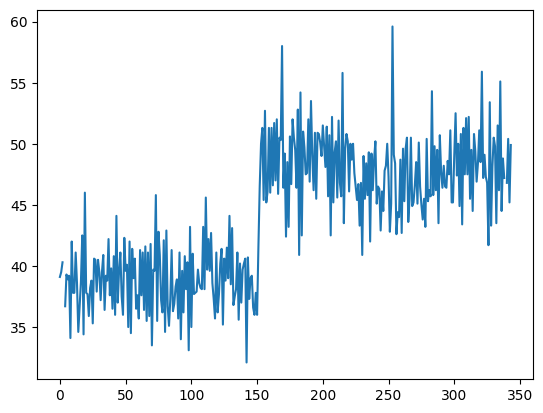

In [ ]:
df.culmen_length_mm.plot()

<ipython-input-7-4c42e92ff055>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.flipper_length_mm)


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

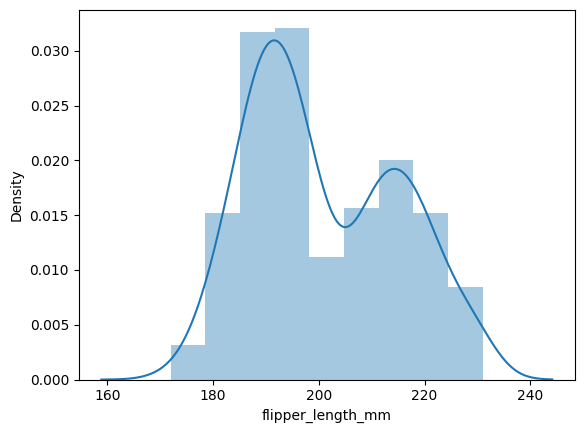

In [ ]:
sns.distplot(df.flipper_length_mm)

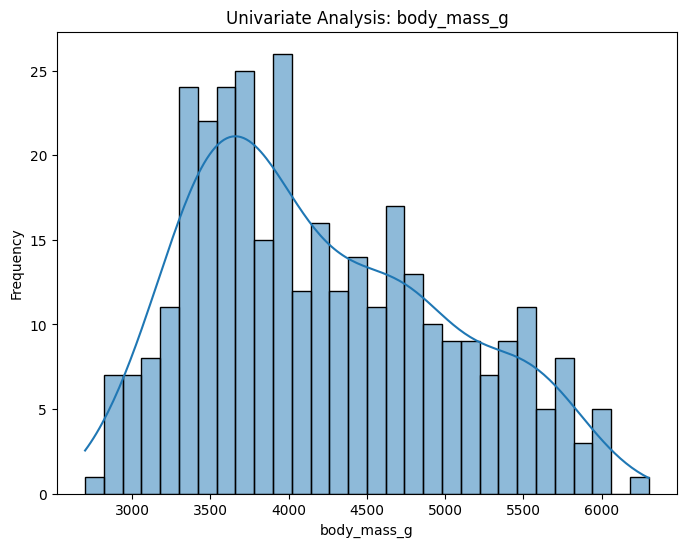

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['body_mass_g'], bins=30, kde=True)
plt.title('Univariate Analysis: body_mass_g')
plt.xlabel('body_mass_g')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='culmen_depth_mm'>

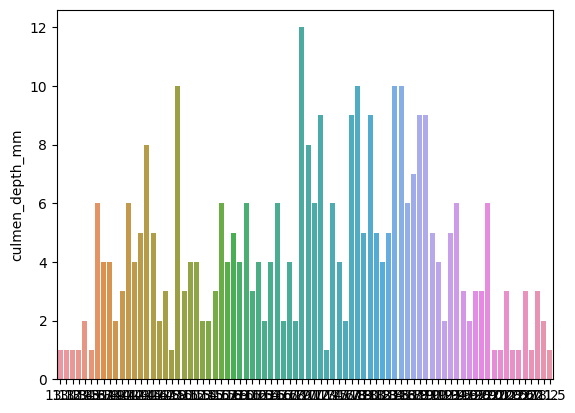

In [ ]:
sns.barplot(x =df.culmen_depth_mm.value_counts().index,y =df.culmen_depth_mm.value_counts() )

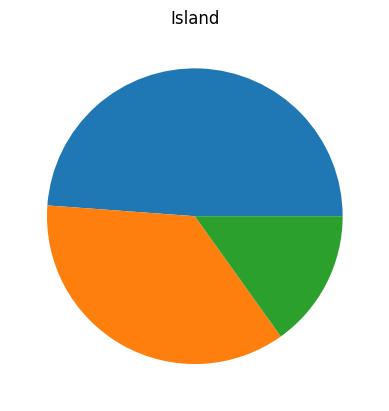

In [ ]:
plt.pie(df.island.value_counts())
plt.title('Island')
plt.show()


<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

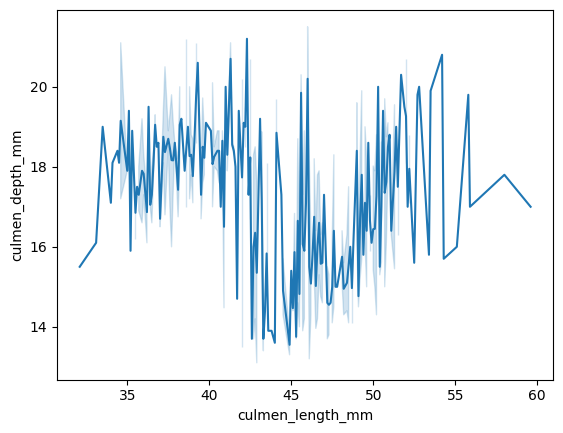

In [15]:
#BIVaraite Anaylsis
sns.lineplot(x = df.culmen_length_mm,y=df.culmen_depth_mm)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

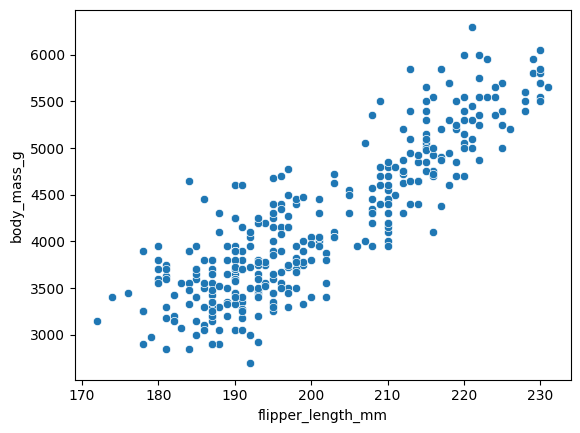

In [16]:
sns.scatterplot(x = df.flipper_length_mm,y=df.body_mass_g)

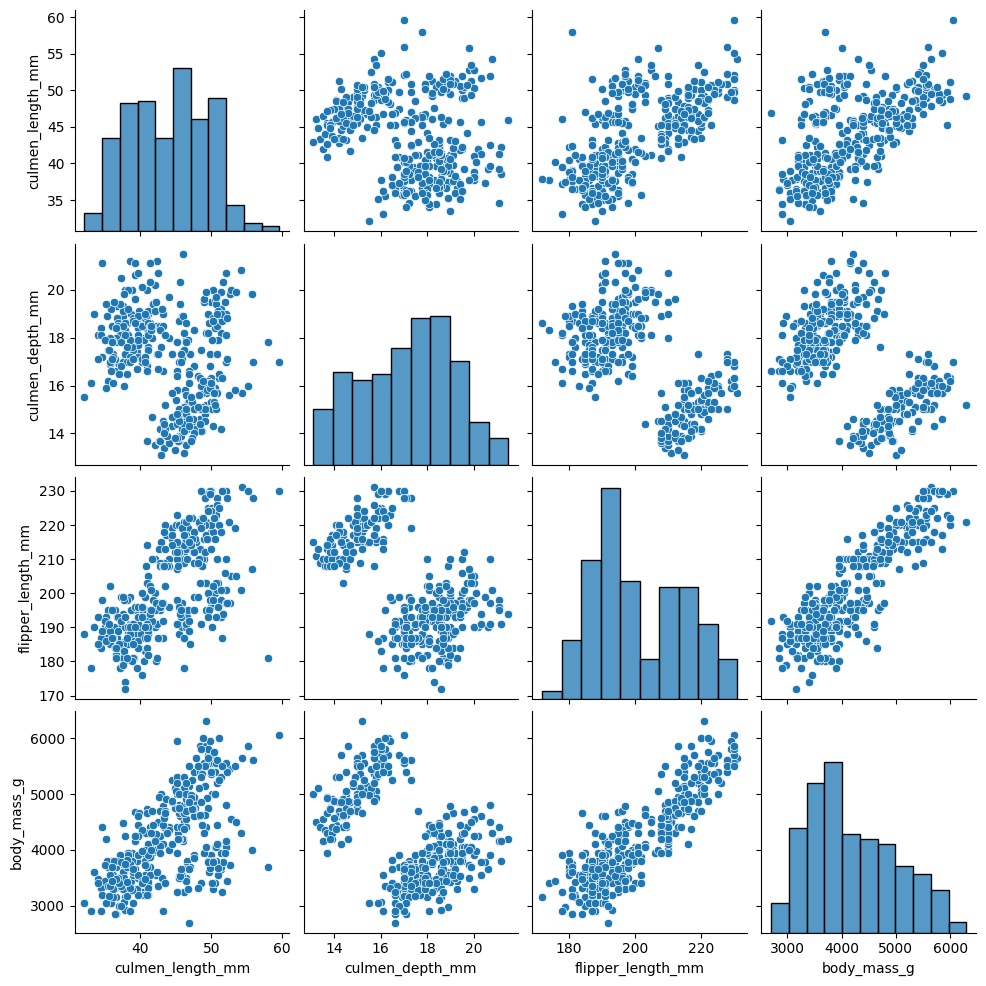

In [17]:
#Multivariate Anaylsis
sns.pairplot(df)

<ipython-input-27-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

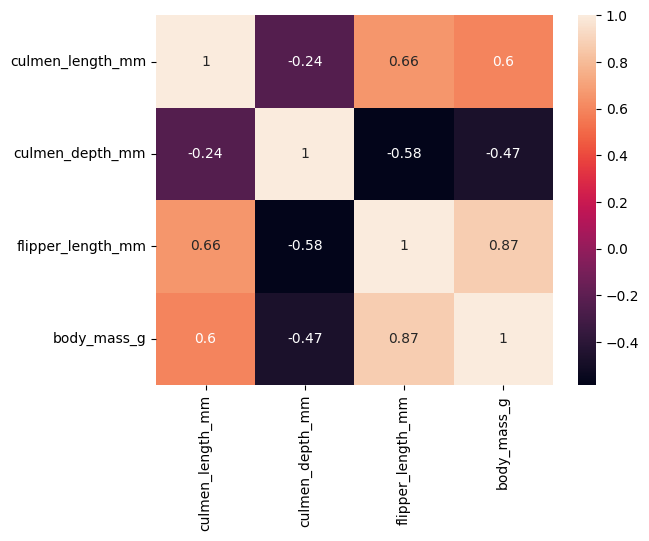

In [27]:
sns.heatmap(df.corr(),annot=True)

In [18]:
#Descriptive Statistics
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [19]:
df.sex.nunique()

3

In [20]:
df.sex.unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [21]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [24]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [23]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [25]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [26]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [28]:
#6. Find the outliers and replace them outliers
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<Axes: >

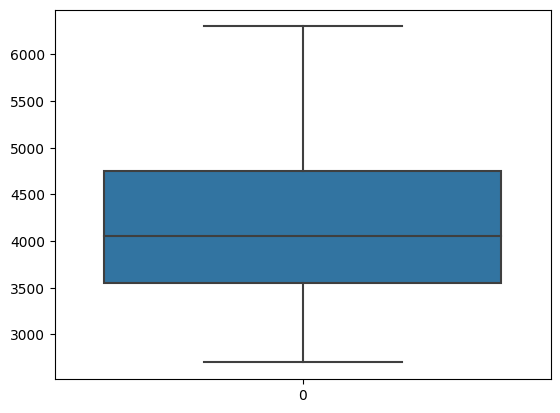

In [32]:
sns.boxplot(df.body_mass_g)  #no outlier present

<Axes: >

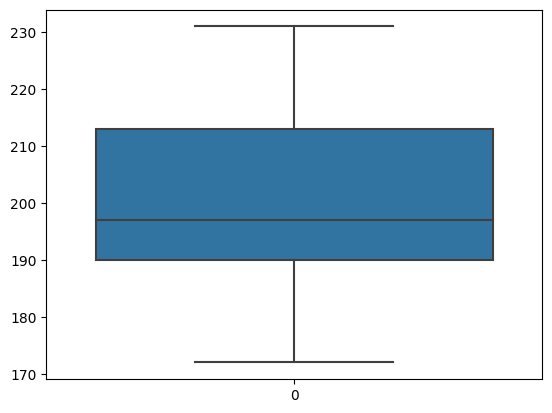

In [33]:
sns.boxplot(df.flipper_length_mm)#no outlier present

<Axes: >

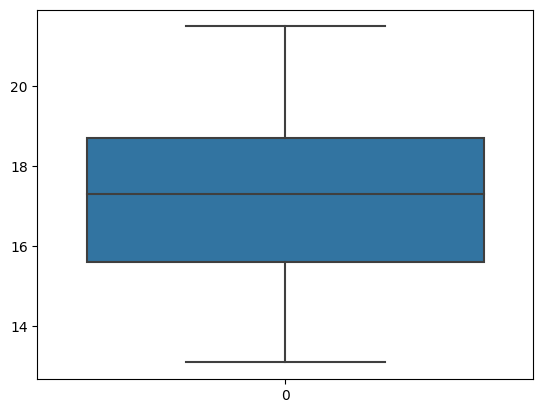

In [34]:
sns.boxplot(df.culmen_depth_mm)#no outlier present

<Axes: >

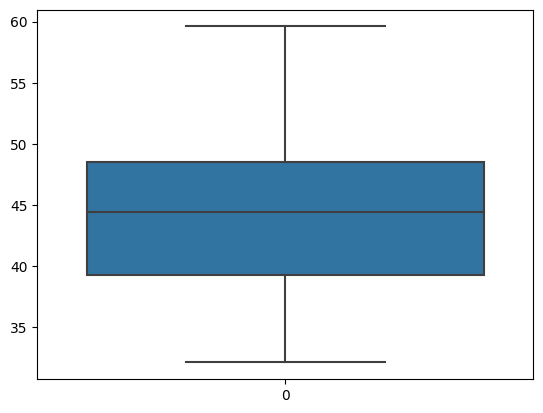

In [35]:
sns.boxplot(df.culmen_length_mm)#no outlier present

In [36]:
#7.Check the correlation of independent variables with the target
target_variable = 'flipper_length_mm'

In [37]:
correlation_with_target = df.corr()[target_variable]


<ipython-input-37-0d4ae3edb31a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()[target_variable]


In [38]:
sorted_correlations = correlation_with_target.abs().sort_values(ascending=False)

In [39]:
print(sorted_correlations)

flipper_length_mm    1.000000
body_mass_g          0.871202
culmen_length_mm     0.656181
culmen_depth_mm      0.583851
Name: flipper_length_mm, dtype: float64


In [41]:
# Check for Categorical columns and perform encoding.
from sklearn.preprocessing import LabelEncoder


In [42]:
#Label encoding
le = LabelEncoder()
df.sex = le.fit_transform(df.sex)
df.island = le.fit_transform(df.island)

In [43]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
3,Adelie,2,NaN,NaN,NaN,NaN,3
4,Adelie,2,36.7,19.3,193.0,3450.0,1


In [44]:
#One-hot Encoding Method
df_main = pd.get_dummies(df,columns =['island'])
df_main.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_0,island_1,island_2
0,Adelie,39.1,18.7,181.0,3750.0,2,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,1
3,Adelie,NaN,NaN,NaN,NaN,3,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,1


In [45]:
df_main.corr()

<ipython-input-45-b764c75a6398>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_main.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_0,island_1,island_2
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110,0.269434,0.239319,0.034007,-0.381728
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,0.322860,-0.632285,0.456357,0.271373
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.197440,0.611637,-0.421252,-0.289777
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.347376,0.627352,-0.460411,-0.258979
sex,0.269434,0.322860,0.197440,0.347376,1.000000,-0.013800,-0.036926,0.068753
island_0,0.239319,-0.632285,0.611637,0.627352,-0.013800,1.000000,-0.733496,-0.412295
island_1,0.034007,0.456357,-0.421252,-0.460411,-0.036926,-0.733496,1.000000,-0.316818
island_2,-0.381728,0.271373,-0.289777,-0.258979,0.068753,-0.412295,-0.316818,1.000000


<ipython-input-46-141015bc01e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_main.corr(),annot =True)


<Axes: >

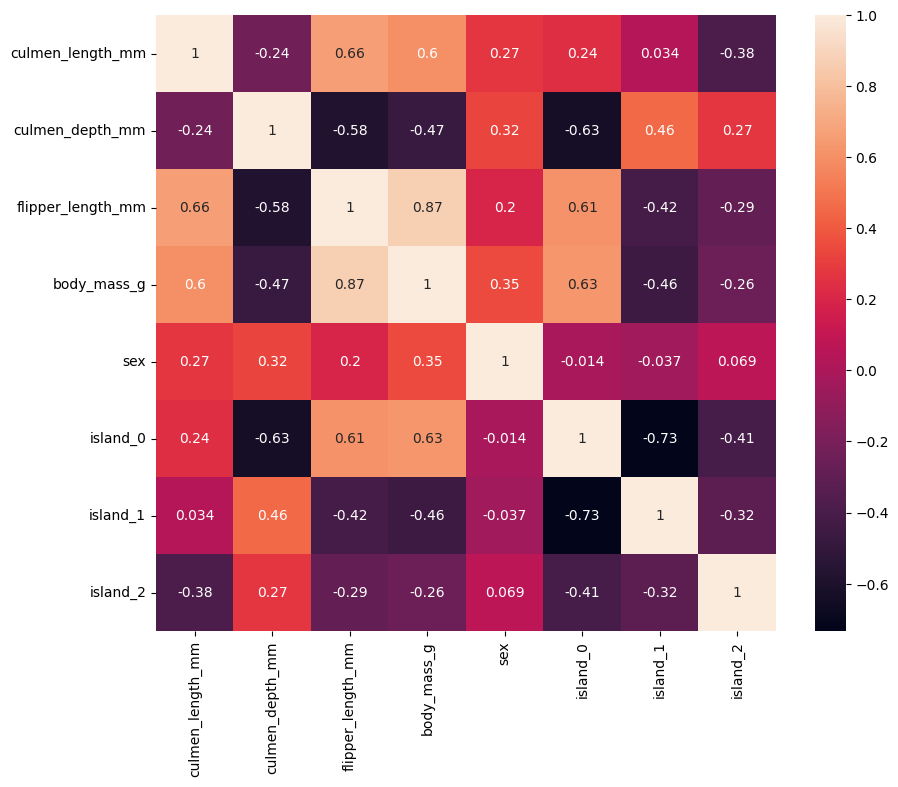

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(),annot =True)

In [48]:
df_main.corr().flipper_length_mm.sort_values(ascending=False)

<ipython-input-48-e8cfae49d8e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_main.corr().flipper_length_mm.sort_values(ascending=False)


flipper_length_mm    1.000000
body_mass_g          0.871202
culmen_length_mm     0.656181
island_0             0.611637
sex                  0.197440
island_2            -0.289777
island_1            -0.421252
culmen_depth_mm     -0.583851
Name: flipper_length_mm, dtype: float64

In [49]:
df_main.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_0,island_1,island_2
0,Adelie,39.1,18.7,181.0,3750.0,2,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,1
3,Adelie,NaN,NaN,NaN,NaN,3,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,1


In [65]:
# Split the data into dependent and independent variables.
y = df_main['species']
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [66]:
X =df_main.drop(columns =['species'],axis =1)
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_0,island_1,island_2
0,39.1,18.7,181.0,3750.0,2,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,1
3,NaN,NaN,NaN,NaN,3,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,1


In [67]:
#10. Scaling the data
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()


In [68]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_0,island_1,island_2
0,0.254545,0.666667,0.152542,0.291667,0.666667,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.333333,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.333333,0.0,0.0,1.0
3,NaN,NaN,NaN,NaN,1.000000,0.0,0.0,1.0
4,0.167273,0.738095,0.355932,0.208333,0.333333,0.0,0.0,1.0


In [69]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [74]:
#12.check the training and testing data shape
X_train.shape

(240, 8)

In [71]:

X_train.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_0,island_1,island_2
258,0.432727,0.059524,0.610169,0.458333,0.333333,1.0,0.0,0.0
332,0.414545,0.250000,0.694915,0.541667,0.333333,1.0,0.0,0.0
121,0.203636,0.797619,0.440678,0.222222,0.666667,0.0,0.0,1.0
61,0.334545,0.952381,0.389831,0.472222,0.666667,1.0,0.0,0.0
70,0.050909,0.702381,0.305085,0.250000,0.333333,0.0,0.0,1.0


In [72]:
y_train.shape

(240,)

In [73]:
X_test.shape

(104, 8)